#Insights CrediFiel

In [3]:
df = pd.read_csv('/content/df_LIMPIO.csv', dtype = {0:str, 1:str, 2:str, 3:str, 8:str, 13:str, 14:str})

In [ ]:
capital_pagares = df.drop_duplicates(subset='idCredito')[['idCredito', 'capital', 'pagare']].copy()

capital_total_sum = capital_pagares['capital'].sum()
pagare_total_sum = capital_pagares['pagare'].sum()

monto_cobrado_total = df['montoCobrado'].sum()

diferencia_cobrado_vs_capital = monto_cobrado_total - capital_total_sum
diferencia_cobrado_vs_pagare = monto_cobrado_total - pagare_total_sum

print(f"Capital total prestado (único por crédito): ${capital_total_sum:,.2f}")
print(f"Total esperado (pagare único por crédito): ${pagare_total_sum:,.2f}")
print(f"Total cobrado: ${monto_cobrado_total:,.2f}")
print(f"\nDiferencia cobrado - capital: ${diferencia_cobrado_vs_capital:,.2f}")
print(f"Diferencia cobrado - pagaré: ${diferencia_cobrado_vs_pagare:,.2f}")

if diferencia_cobrado_vs_pagare < 0:
    print("Resultado vs pagaré: PÉRDIDA")
elif diferencia_cobrado_vs_pagare > 0:
    print("Resultado vs pagaré: GANANCIA")
else:
    print("Resultado vs pagaré: EQUILIBRIO")


Capital total prestado (único por crédito): $804,517,353.30
Total esperado (pagare único por crédito): $1,856,306,395.53
Total cobrado: $56,177,280.41

Diferencia cobrado - capital: $-748,340,072.89
Diferencia cobrado - pagaré: $-1,800,129,115.12
Resultado vs pagaré: PÉRDIDA


In [ ]:
df_cobrados['dias_respuesta_banco'].value_counts().sort_index()


,count
dias_respuesta_banco,
0,34416
1,8804
2,8198
3,5750
4,3954
5,4791
6,1293
7,768
8,203


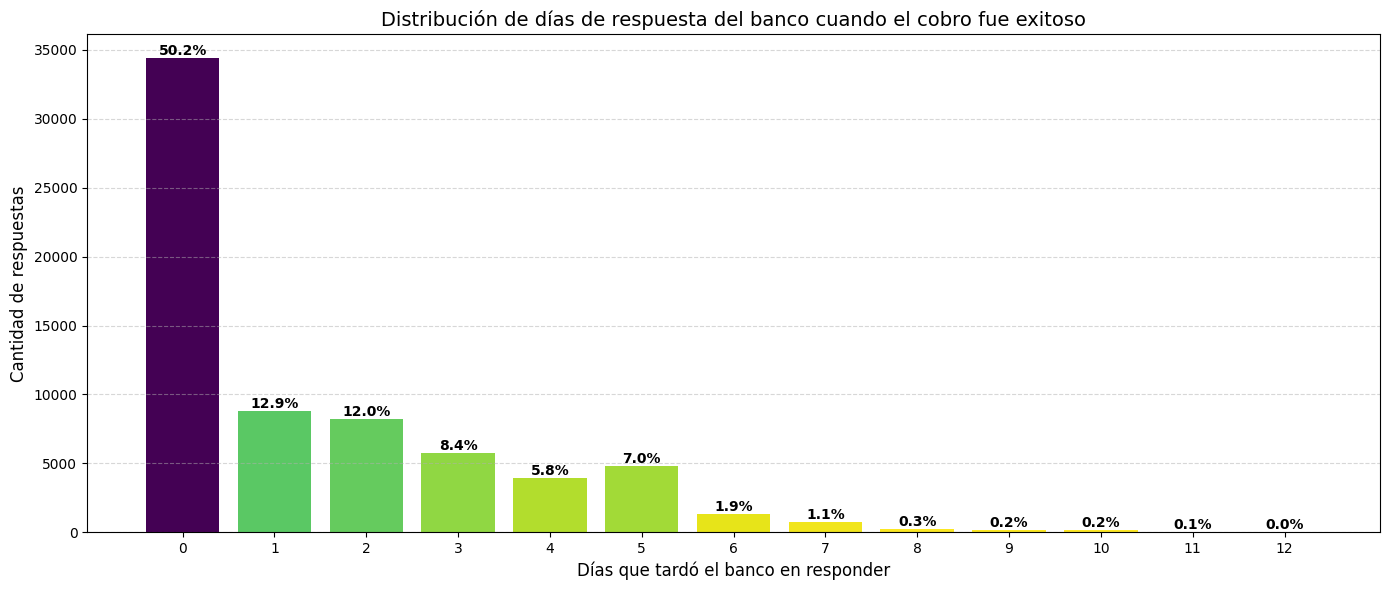

In [ ]:
import matplotlib.pyplot as plt

conteo_dias = df_cobrados['dias_respuesta_banco'].value_counts().sort_index()
total = conteo_dias.sum()

plt.figure(figsize=(14, 6))
bars = plt.bar(
    conteo_dias.index,
    conteo_dias.values,
    color=plt.cm.viridis_r(conteo_dias.values / max(conteo_dias.values))
)

plt.xlabel('Días que tardó el banco en responder', fontsize=12)
plt.ylabel('Cantidad de respuestas', fontsize=12)
plt.title('Distribución de días de respuesta del banco cuando el cobro fue exitoso', fontsize=14)
plt.xticks(conteo_dias.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    yval = bar.get_height()
    porcentaje = yval / total * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 5,
        f'{porcentaje:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()
